In [19]:
%matplotlib inline
import pandas as pd
from pivottablejs import pivot_ui
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [28]:
grades = pd.read_csv(r"C:\Users\John\OneDrive\Work\educational data mining consulting\MSU project pathways\data\GraduatedGradesByCrsCode.csv")

In [29]:
grades.head(5)

,﻿PlaceholderID,degree conferred for this major,SubjectCode,crse_code,grade_code
0,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,MTH,103,3.5
1,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,MTH,132,0.0
2,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,MTH,132,2.5
3,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,MTH,133,2.0
4,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,183,3.0


In [33]:

new_course_ids = []

upper_lower = True

if upper_lower == False:

    for course in grades.crse_code:
        if course[0] == '1':
            new_course_ids.append('100')
        elif course[0] == '2':
            new_course_ids.append('200')
        elif course[0] == '3':
            new_course_ids.append('300')
        elif course[0] == '4':
            new_course_ids.append('400')
        elif course[0] == '8':
            new_course_ids.append('800')
        elif course[0] == '9':
            new_course_ids.append('900')
            
else:
    for course in grades.crse_code:
        if course[0] == '1':
            new_course_ids.append('lower')
        elif course[0] == '2':
            new_course_ids.append('lower')
        elif course[0] == '3':
            new_course_ids.append('upper')
        elif course[0] == '4':
            new_course_ids.append('upper')
        elif course[0] == '8':
            new_course_ids.append('upper')
        elif course[0] == '9':
            new_course_ids.append('upper')

In [34]:
grades['new_course_ids'] = new_course_ids

In [80]:
grades[grades['degree conferred for this major']=='Y'].groupby(['SubjectCode', 'new_course_ids'])['grade_code'].mean()

SubjectCode  new_course_ids
MTH          lower             2.767779
             upper             3.070032
PHY          lower             3.310724
             upper             3.156505
Name: grade_code, dtype: float64

In [ ]:
err1 = grades[grades['degree conferred for this major']=='Y'].groupby(['SubjectCode', 'new_course_ids'])['grade_code'].std()
err2 = grades[grades['degree conferred for this major']=='N'].groupby(['SubjectCode', 'new_course_ids'])['grade_code'].std()

df1 = pd.DataFrame(grades[grades['degree conferred for this major']=='Y'].groupby(['SubjectCode', 'new_course_ids'])['grade_code'].mean())
df2 = pd.DataFrame(grades[grades['degree conferred for this major']=='N'].groupby(['SubjectCode', 'new_course_ids'])['grade_code'].mean())
df = df1.join(df2, rsuffix='_N', lsuffix='_Y')

In [106]:
grades.groupby(['degree conferred for this major','SubjectCode', 'new_course_ids']).count()

﻿PlaceholderID  \
degree conferred for this major SubjectCode new_course_ids                   
N                               MTH         lower                     3202   
                                            upper                     1028   
                                PHY         lower                     2373   
                                            upper                     1365   
Y                               MTH         lower                     1378   
                                            upper                     1585   
                                PHY         lower                     2182   
                                            upper                     4412   

                                                            crse_code  \
degree conferred for this major SubjectCode new_course_ids              
N                               MTH         lower                3202   
                                            upper                1028   
                                PHY         lower                2373   
                                            upper                1365   
Y                               MTH         lower                1378   
                                            upper                1585   
                                PHY         lower                2182   
                                            upper                4412   

                                                            grade_code  
degree conferred for this major SubjectCode new_course_ids              
N                               MTH         lower                 3202  
                                            upper                 1028  
                                PHY         lower                 2373  
                                            upper                 1365  
Y                               MTH         lower                 1378  
                                            upper                 1585  
                                PHY         lower                 2182  
                                            upper                 4412

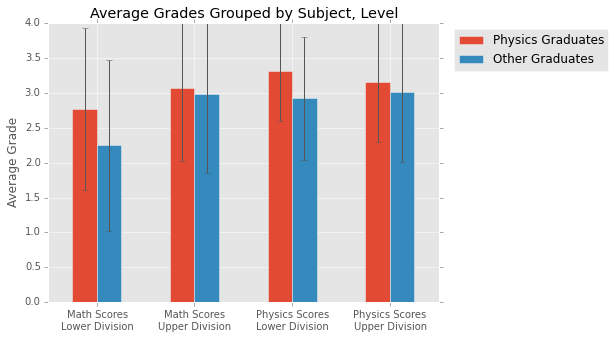

In [113]:


f, ax1  = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(7,5))

df.plot(kind='bar', yerr=[err1, err2], ax=ax1)

ax1.legend(['Physics Graduates','Other Graduates'], bbox_to_anchor=[1.45,1])
ax1.set_ylim(0,4)
ax1.set_ylabel('Average Grade')
ax1.set_xlabel('')
ax1.set_xticklabels(['Math Scores\nLower Division', 'Math Scores\nUpper Division'
                  ,'Physics Scores\nLower Division', 'Physics Scores\nUpper Division'], rotation=0)
#f.subplots_adjust(hspace=0)

#grades.boxplot(by=['SubjectCode', 'new_course_ids'], ax=ax2)

ax1.set_title('Average Grades Grouped by Subject, Level')

# Things to remember

+ only graduated students
+ error bars are the standard deviation

# initial insights

+ math scores are somewhat lower on average for non-physics students as they are physics students
+ What happens if we separate STEM vs Non-STEM graduates? Maybe non-STEM graduates get lower grades in math?

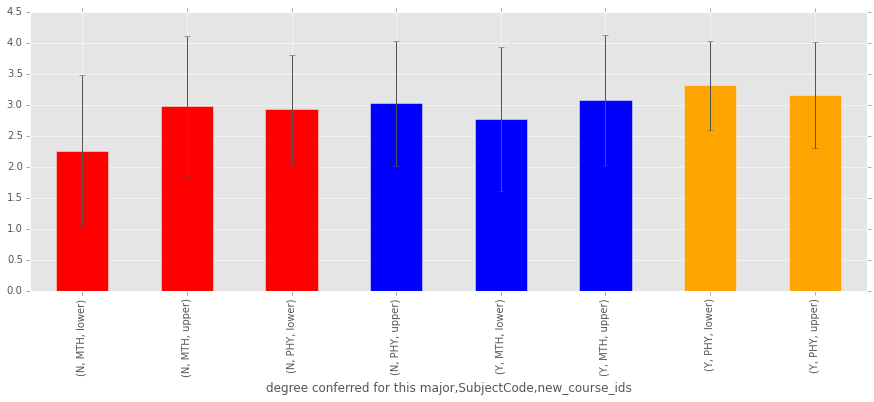

In [45]:
yerr = grades.groupby(['degree conferred for this major', 'SubjectCode', 'new_course_ids'])['grade_code'].std()
ax = grades.groupby(['degree conferred for this major', 'SubjectCode', 'new_course_ids'])['grade_code'].mean().plot(kind='bar'
                                                                                                                    , yerr=yerr
                                                                                                                   ,figsize=(15,5)
                                                                                                                   ,color=['red','red','red'
                                                                                                                          ,'blue','blue','blue'
                                                                                                                          ,'orange','orange'])

#ax.set_xticklabels(['Math, Non-physics\nlower',]*8, rotation=45)

In [25]:
grades[(grades.SubjectCode == 'PHY') & (grades['degree conferred for this major'] == )]

,﻿PlaceholderID,degree conferred for this major,SubjectCode,crse_code,grade_code,new_course_ids
4,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,183,3.0,100
6,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,184,0.0,100
7,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,215,1.5,200
9,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,184,2.0,100
10,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,191,2.5,100
11,000A5CF0-0DBA-48BD-B7C1-982BBDFFF40B,N,PHY,481,1.5,400
19,00CB2383-A18E-409E-B606-172810424C95,Y,PHY,191,4.0,100
20,00CB2383-A18E-409E-B606-172810424C95,Y,PHY,215,4.0,200
24,00CB2383-A18E-409E-B606-172810424C95,Y,PHY,192,3.0,100
25,00CB2383-A18E-409E-B606-172810424C95,Y,PHY,321,3.5,300
